# Gradient Descent

Gradient descent explained in a notebook.

## Contents

[Setup](#setup) <br>
[Create Function](#create-function) <br>
[Generate Demo Data Based on the Function](#generate-demo-data-based-on-the-function) <br>
[Explore Fitting the Function by Hand](#explore-fitting-the-function-by-hand) <br>

## Setup

In [1]:
import sympy as sym
from sympy import symbols, lambdify
import numpy as np
from numpy.random import normal

# plotting
import seaborn as sns

# widgets
from ipywidgets import interact

In [2]:
# set plot style for dark mode (not necessary to understand the notebook)
sns.set_theme(rc={
                  'font.size': 10,
                  'xtick.labelsize': 8,
                  'ytick.labelsize': 8,
                  'axes.labelsize': 8,
                  'axes.spines.right': False,
                  'axes.spines.top': False,
                  'axes.facecolor': '#1E1E1E',  # Very dark gray
                  'figure.facecolor': '#1E1E1E',  # Very dark gray
                  'axes.grid': False,
                  'xtick.color': 'w',  # White x-axis tick labels
                  'ytick.color': 'w',  # White y-axis tick labels
                  'text.color': 'w',  # White text
                  'axes.labelcolor': 'w',  # White axis labels
                  'figure.titlesize': 'large',  # Set the size of the figure title
                  'figure.titleweight': 'bold',  # Set the weight of the figure title
              })

# store a colour palette
col_pal = sns.color_palette("muted")
sns.set_palette(col_pal)

In [4]:
# function definitions (not necessary to understand the notebook)

# set the seed for reproducibility
np.random.seed(42)

def add_noise(x, mult, add):
    """
    Adds random noise to a given value.

    Parameters:
    x (float): The value to add noise to.
    mult (float): The standard deviation of the multiplicative noise.
    add (float): The standard deviation of the additive noise.

    Returns:
    float: The noisy value.
    """
    noise_mult = 1 + normal(scale=mult, size=x.shape)
    noise_add = normal(scale=add, size=x.shape)
    return x * noise_mult + noise_add 

In [3]:
# supress unhelpful warnings (not necessary to understand the notebook)
import warnings

# this is an issue within the seaborn library and will likely be fixed in the future
warnings.filterwarnings("ignore", category=FutureWarning)

## Create Function

In [5]:
a, b, c, x = symbols('a b c x')
expr = a*x**2 + b*x + c
expr

a*x**2 + b*x + c

In [6]:
expr.subs({a: 3, b: 2, c: 1})

3*x**2 + 2*x + 1

In [7]:
# turn expression into a function
f = lambdify((x,), expr.subs({a: 3, b: 2, c: 1}))

f(2)

17

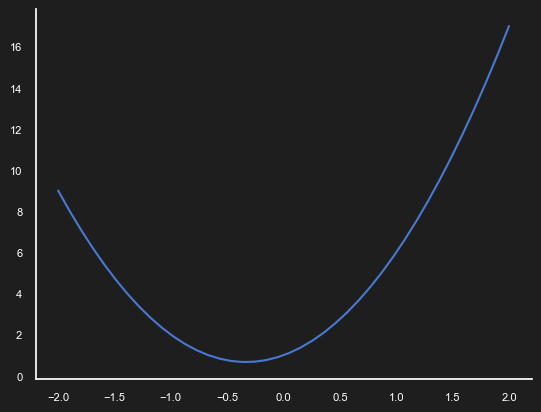

In [8]:
x = np.linspace(-2, 2, 40)
sns.lineplot(x=x, y=f(x));

## Generate Demo Data Based on the Function

Add noise to the function.

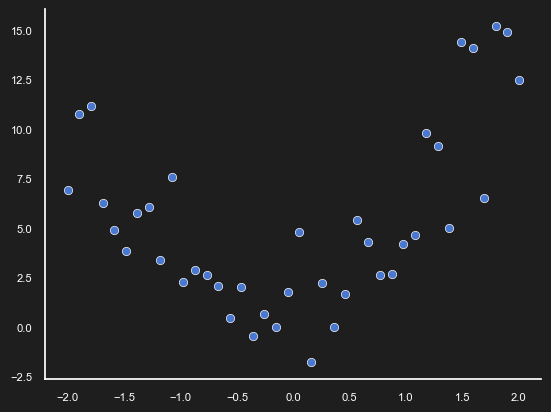

In [11]:
# fix x and y values
x_vals = np.linspace(-2, 2, 40)
y_vals = add_noise(f(x_vals), 0.3, 1.5)

sns.scatterplot(x=x_vals, y=y_vals);

## Explore Fitting the function by hand

In [17]:
# set expression
a, b, c, x = symbols('a b c x')
expr = a*x**2 + b*x + c

# Create a function
f_lambdified = lambdify((x, a, b, c), expr)



@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a=1.5, b=1.5, c=1.5):
    sns.scatterplot(x=x_vals, y=y_vals)
    
    # Evaluate the lambdified function with the numerical values of a, b, c
    y_fit = f_lambdified(x_vals, a, b, c)
    sns.lineplot(x=x_vals, y=y_fit).set(ylim=(-2, 20))


interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

## Create a Loss Function

In [13]:
def mse(real, predicted):
    """
Calculates the mean squared error between the real and predicted values.

Parameters:
real (numpy.ndarray): The real values.
predicted (numpy.ndarray): The predicted values.

Returns:
float: The mean squared error between the real and predicted values.
"""
    return np.mean((real - predicted)**2)

In [16]:
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a=1.5, b=1.5, c=1.5):
    sns.scatterplot(x=x_vals, y=y_vals)
    
    # Evaluate the lambdified function with the numerical values of a, b, c
    y_fit = f_lambdified(x_vals, a, b, c)
    loss = mse(y_vals, y_fit)
    sns.lineplot(x=x_vals, y=y_fit).set(ylim=(-2, 20), 
                                        title=f"MSE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [21]:
def quad_mse(a, b, c):
    f = lambdify((x,), expr.subs({'a': a, 'b': b, 'c': c}))
    return mse(f(x_vals), y_vals)

In [22]:
quad_mse(1.5, 1.5, 1.5)

10.915640238579467